In [1]:
import os
import math
import shutil
import requests
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Utility
Resize and crop image to be square

In [2]:
def open_and_resize(file, resize=(500,500)):
    if file.startswith('http'):
        response = requests.get(file)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        image = Image.open(file).convert('RGB')
    w, h = image.size
    left = int((w - h) / 2 if w > h else 0)
    upper = int((h - w) / 2 if h > w else 0)
    right = int(w - ((w - h) / 2) if w > h else w)
    lower = int(h - ((h - w) / 2) if h > w else h)
    image = image.crop((left, upper, right, lower))
    image.thumbnail(resize)
    return image

# Convolution
Implements filtering on a single image with selected pad and stride

In [3]:
def conv2d(X, W, pad=1, stride=1):
    # filter\kernel size
    f, f, _ = W.shape
    n_C = 1
    
    # new output volume
    n_H = int(np.floor(X.shape[0] - f + 2 * pad) / (stride * 1.)) + 1
    n_W = int(np.floor(X.shape[1] - f + 2 * pad) / (stride * 1.)) + 1
    
    Z = np.zeros((n_H, n_W, n_C))
    
    # padding
    x = np.pad(X, ((pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
    for h in range(n_H):
        for w in range(n_W):
            for c in range(n_C):
                vert_start = h * stride
                vert_end = vert_start + f
                horiz_start = w * stride
                horiz_end = horiz_start + f

                Z[h, w, c] = np.sum(W[:,:,c] * x[vert_start:vert_end,horiz_start:horiz_end,:])
    return Z

# Max Pooling
Implements max pooling with the given pool size and stride.

In [4]:
def max_pooling2d(X, pool_size=2, stride=2):
    # new output volume
    n_H = int(np.floor(X.shape[0] - pool_size) / (stride * 1.)) + 1
    n_W = int(np.floor(X.shape[1] - pool_size) / (stride * 1.)) + 1
    n_C = X.shape[2]
    
    Z = np.zeros((n_H, n_W, n_C))
    for h in range(n_H):
        for w in range(n_W):
            for c in range(n_C):
                vert_start = h * stride
                vert_end = vert_start + pool_size
                horiz_start = w * stride
                horiz_end = horiz_start + pool_size

                Z[h, w, c] = np.amax(X[vert_start:vert_end,horiz_start:horiz_end,c])
    
    return Z

# Filter\Kernel

In [37]:
w = np.zeros((3, 3, 3))
#t = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) / 3
t = np.array([[0, 0, 0], [0, 3., 0], [0, 0, 0]]) / 3
w[:,:,0] = t
w[:,:,1] = t
w[:,:,2] = t

# Example Filter Application
Run filter on selected image

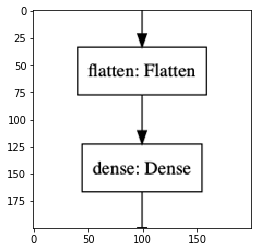

In [38]:
image = np.array(open_and_resize("model.png", resize=(200,200)))
plt.imshow(image)

In [39]:
n.shape

(200, 200, 1)

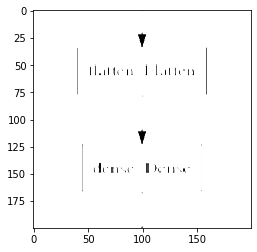

In [40]:
n = conv2d(image, w)
plt.imshow(Image.fromarray(n[:,:,0]).convert("L"), cmap="gray")

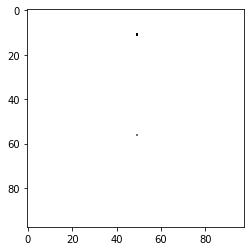

In [41]:
x = max_pooling2d(n, pool_size=5)
plt.imshow(Image.fromarray(x[:,:,0]).convert("L"), cmap='gray')